In [3]:
import os
os.environ['KERAS_BACKEND']='theano'

%matplotlib inline

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, CuDNNLSTM
from keras.datasets import imdb

from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Theano backend.


Using Keras version: 2.2.4 backend: theano


In [4]:
from keras.datasets import cifar10  
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
y_train.shape


X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)


(50000, 1)

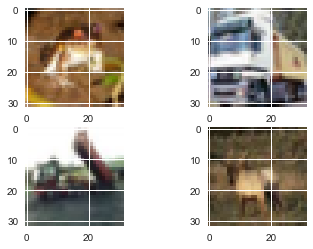

In [66]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [67]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [68]:
seed = 7
numpy.random.seed(seed)

In [69]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [75]:
num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
num_pixels

3072

In [77]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [78]:
X_train = X_train / 255
X_test = X_test / 255

In [79]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [80]:
def baseline_model():
	
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [81]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 63s - loss: 11.7747 - acc: 0.1746 - val_loss: 11.5572 - val_acc: 0.2024
Epoch 2/10
 - 63s - loss: 11.6984 - acc: 0.1813 - val_loss: 12.1073 - val_acc: 0.1649
Epoch 3/10
 - 138s - loss: 9.3670 - acc: 0.2126 - val_loss: 8.7455 - val_acc: 0.2490
Epoch 4/10
 - 194s - loss: 8.7984 - acc: 0.2357 - val_loss: 8.6769 - val_acc: 0.2580
Epoch 5/10
 - 199s - loss: 8.4089 - acc: 0.2375 - val_loss: 7.2846 - val_acc: 0.2749
Epoch 6/10
 - 199s - loss: 6.0343 - acc: 0.2939 - val_loss: 4.5726 - val_acc: 0.3116
Epoch 7/10
 - 199s - loss: 1.9241 - acc: 0.3863 - val_loss: 1.6493 - val_acc: 0.4147
Epoch 8/10
 - 202s - loss: 1.6103 - acc: 0.4296 - val_loss: 1.5819 - val_acc: 0.4368
Epoch 9/10
 - 206s - loss: 1.5551 - acc: 0.4504 - val_loss: 1.5913 - val_acc: 0.4319
Epoch 10/10
 - 214s - loss: 1.5057 - acc: 0.4696 - val_loss: 1.5641 - val_acc: 0.4404
Baseline Error: 55.96%


In [82]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [83]:
seed = 7
numpy.random.seed(seed)

In [84]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).astype('float32')

In [85]:
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [86]:
def baseline_model():
	
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))